In [2]:
!pip install open3d

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 93.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 88.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 75.6 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


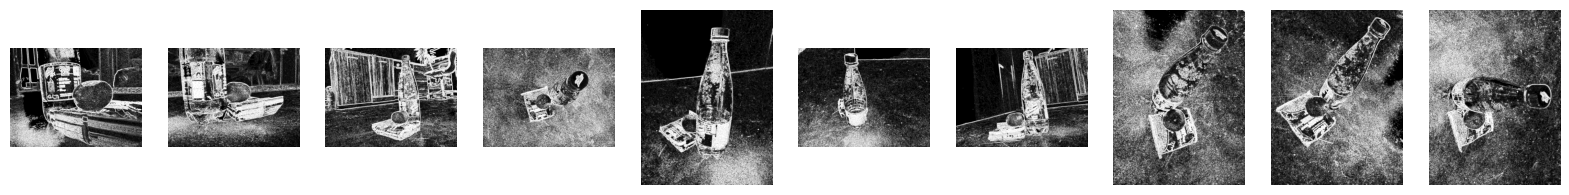

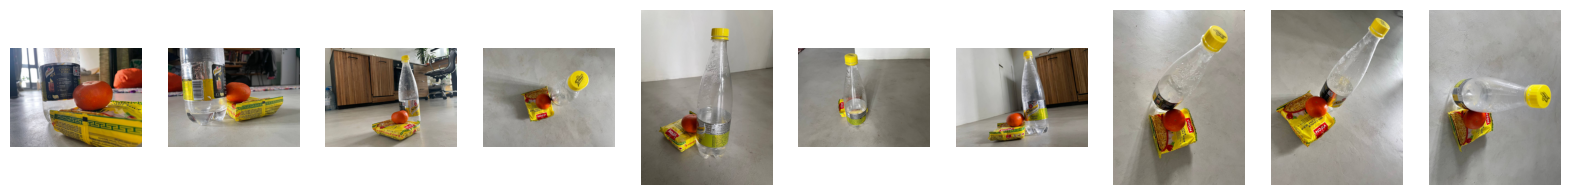

NameError: name 'optimized_images' is not defined

In [9]:
# open3d modeling
import cv2
import matplotlib.pyplot as plt

# Image optimization function
def optimize_image(image_path):
    img = cv2.imread(image_path)

    img = cv2.convertScaleAbs(img, alpha=1.2, beta=20)

    img = cv2.GaussianBlur(img, (3, 3), 0)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.Laplacian(img, cv2.CV_64F, ksize=5)
    img = cv2.convertScaleAbs(img)

    img = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

    return img

# Optimization and display of optimized images
fig, axes = plt.subplots(1, len(image_paths), figsize=(20, 5))
for i, path in enumerate(image_paths):
    optimized_img = optimize_image(path)
    axes[i].imshow(optimized_img, cmap='gray')
    axes[i].axis('off')

plt.show()

# Output optimized images
fig, axes = plt.subplots(1, len(image_paths), figsize=(20, 5))
for i, path in enumerate(image_paths):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[i].imshow(img)
    axes[i].axis('off')
plt.show()

# Function for detecting key points and defining descriptors
def detect_keypoints_and_descriptors(optimized_images):
    keypoints_list = []
    descriptors_list = []

    for img in optimized_images:
        sift = cv2.SIFT_create()
        keypoints, descriptors = sift.detectAndCompute(img, None)
        keypoints_list.append(keypoints)
        descriptors_list.append(descriptors)

    return keypoints_list, descriptors_list

# Call a function to detect keypoints and define descriptors
keypoints_list, descriptors_list = detect_keypoints_and_descriptors(optimized_images)

# Output the number of key points and descriptors for each image
for i, path in enumerate(image_paths):
    print(f"Image {path} has {len(keypoints_list[i])} key points {descriptors_list[i].shape[0]} descriptors.")




In [10]:
def optimize_image_gray(image_path):
    img = cv2.imread(image_path)

    img = cv2.convertScaleAbs(img, alpha=1.2, beta=20)

    img = cv2.GaussianBlur(img, (3, 3), 0)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    img = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

    return img



In [11]:
optimized_images_gray = []
for path in image_paths:
    optimized_img_gray = optimize_image_gray(path)
    optimized_images_gray.append(optimized_img_gray)




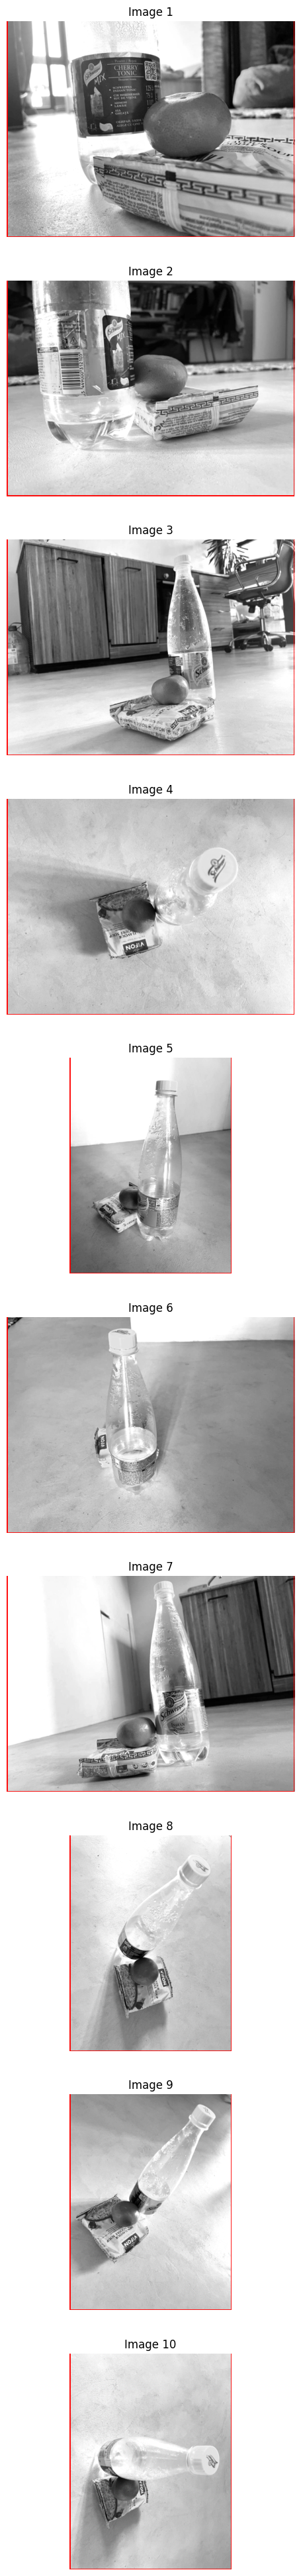

In [12]:

contours_list = []
for img_gray in optimized_images_gray:
    contours, _ = cv2.findContours(img_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours_list.append(contours)


fig, axes = plt.subplots(len(optimized_images_gray), 1, figsize=(10, 5 * len(optimized_images_gray)))
for i, (img_gray, contours) in enumerate(zip(optimized_images_gray, contours_list)):
    axes[i].imshow(img_gray, cmap='gray')
    axes[i].set_title(f"Image {i+1}")
    for contour in contours:
        axes[i].plot(contour[:, 0, 0], contour[:, 0, 1], '-r', linewidth=2)
    axes[i].axis('off')

plt.show()



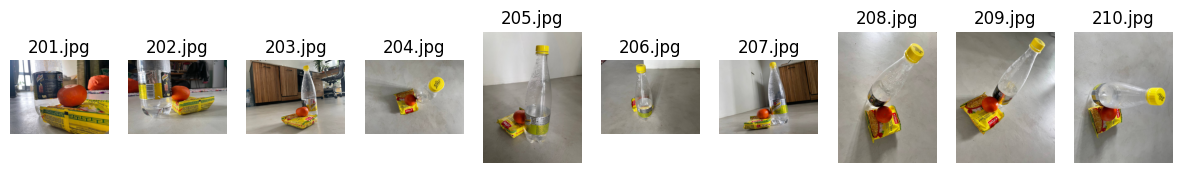

In [13]:
import matplotlib.pyplot as plt

image_paths = ["201.jpg","202.jpg","203.jpg","204.jpg","205.jpg","206.jpg","207.jpg","208.jpg","209.jpg","210.jpg"]

fig, axes = plt.subplots(1, len(image_paths), figsize=(15, 5))

for i, image_path in enumerate(image_paths):

    img = plt.imread(image_path)

    axes[i].imshow(img)
    axes[i].set_title(image_path)
    axes[i].axis('off')

plt.show()







In [14]:
import cv2
import numpy as np

def detect_shapes(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    _, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)

    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    circles = []
    triangles = []
    squares = []
    rectangles = []
    pentagons = []
    hexagons = []

    for contour in contours:
        vertices = len(cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True))

        if vertices == 3:
            triangles.append(contour)
        elif vertices == 4:
            x, y, w, h = cv2.boundingRect(contour)
            aspect_ratio = float(w) / h
            if 0.95 <= aspect_ratio <= 1.05:
                squares.append(contour)
            else:
                rectangles.append(contour)
        elif vertices == 5:
            pentagons.append(contour)
        elif vertices == 6:
            hexagons.append(contour)
        else:
            circles.append(contour)

    return circles, triangles, squares, rectangles, pentagons, hexagons

image_paths = ["201.jpg", "202.jpg", "203.jpg", "204.jpg", "205.jpg", "206.jpg", "207.jpg", "208.jpg", "209.jpg", "210.jpg"]

for image_path in image_paths:
    circles, triangles, squares, rectangles, pentagons, hexagons = detect_shapes(image_path)

    print(f"Image: {image_path}")
    print(f"Number of circles: {len(circles)}")
    print(f"Number of triangles: {len(triangles)}")
    print(f"Number of squares: {len(squares)}")
    print(f"Number of rectangles: {len(rectangles)}")
    print(f"Number of pentagons: {len(pentagons)}")
    print(f"Number of hexagons: {len(hexagons)}")
    print()




Image: 201.jpg
Number of circles: 1511
Number of triangles: 76
Number of squares: 15
Number of rectangles: 111
Number of pentagons: 25
Number of hexagons: 60

Image: 202.jpg
Number of circles: 388
Number of triangles: 11
Number of squares: 1
Number of rectangles: 24
Number of pentagons: 5
Number of hexagons: 18

Image: 203.jpg
Number of circles: 456
Number of triangles: 20
Number of squares: 4
Number of rectangles: 38
Number of pentagons: 10
Number of hexagons: 18

Image: 204.jpg
Number of circles: 275
Number of triangles: 2
Number of squares: 0
Number of rectangles: 4
Number of pentagons: 2
Number of hexagons: 4

Image: 205.jpg
Number of circles: 195
Number of triangles: 3
Number of squares: 1
Number of rectangles: 12
Number of pentagons: 4
Number of hexagons: 9

Image: 206.jpg
Number of circles: 161
Number of triangles: 7
Number of squares: 1
Number of rectangles: 17
Number of pentagons: 4
Number of hexagons: 4

Image: 207.jpg
Number of circles: 357
Number of triangles: 10
Number of 

In [15]:
circle_vertices = np.array(circle_vertices)



NameError: name 'circle_vertices' is not defined

In [16]:
!pip install mayavi


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 59.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.3/229.3 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.9/268.9 kB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 86.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 70.4 MB/s eta 0:00:00
  Using cached vtk-9.3.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (92.0 MB)
  Created wheel for mayavi: filename=mayavi-4.8.1-cp310-cp310-linux_x86_64.whl size=16167223 sha256=1d701989d9b507a991bd427a15bc911945e137c5c23d1ee194b80fa1ddb633c4
  Stored in directory: /root/.cache/pip/wheels/c2/6b/23/49aa8ae5063a76fbc35ce90e74f8361cddb9d3a86d5a41ec0a
Successfully bu

In [1]:
!pip install PyQt5


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.1/338.1 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 10.9 MB/s eta 0:00:00


In [17]:
from mayavi import mlab
import numpy as np

def create_3d_model(shapes):
    fig = mlab.figure(bgcolor=(1, 1, 1), size=(800, 600))

    for vertices, color in shapes.items():
        x, y, z = zip(*vertices)
        triangles = [(0, 1, 2)]
        mlab.triangular_mesh(x, y, z, triangles, color=color)

    mlab.show()

shapes = {
    ((0, 0, 0), (1, 0, 0), (0.5, 0.87, 0)): (1, 0, 0),
}

# 3D modeling
create_3d_model(shapes)


/usr/local/lib/python3.10/dist-packages/traits/etsconfig/etsconfig.py:425: UserWarning: Environment variable "HOME" not set, setting home directory to /tmp
  warn(


********************************************************************************
         to build the TVTK classes (9.2). This may cause problems.
         Please rebuild TVTK.
********************************************************************************



ImportError: Could not import backend for traitsui.  Make sure you
        have a suitable UI toolkit like PyQt/PySide or wxPython
        installed.

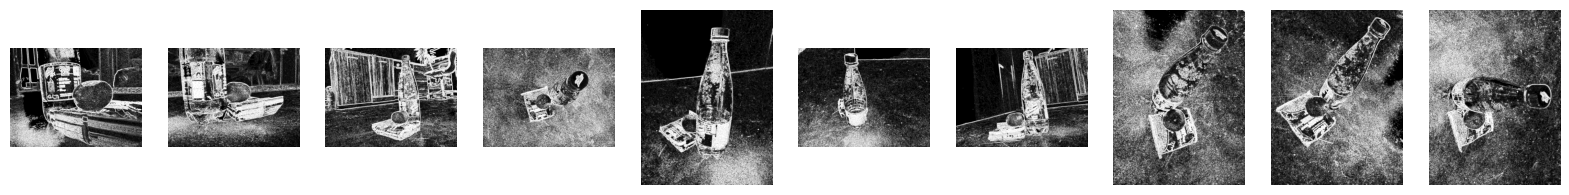

In [18]:
# Optimization
optimized_images = []
for path in image_paths:
    optimized_img = optimize_image(path)
    optimized_images.append(optimized_img)

fig, axes = plt.subplots(1, len(optimized_images), figsize=(20, 5))
for i, img in enumerate(optimized_images):
    axes[i].imshow(img, cmap='gray')
    axes[i].axis('off')
plt.show()


In [21]:

first_image_shape = optimized_images[0].shape


if all(image.shape == first_image_shape for image in optimized_images):
    x_train = np.array(optimized_images)
else:
    print("Optimized image sizes vary. It is necessary to bring them to the same size.")




Optimized image sizes vary. It is necessary to bring them to the same size.


In [20]:
desired_width = 128
desired_height = 128


In [22]:

first_image_shape = optimized_images[0].shape

if all(image.shape == first_image_shape for image in optimized_images):
    print("All optimized images are the same size.")
else:
    print("Optimized images param")
    avg_width = int(np.mean([image.shape[1] for image in optimized_images]))
    avg_height = int(np.mean([image.shape[0] for image in optimized_images]))
    print("Average size of optimized images:", (avg_width, avg_height))

    # Змінюємо розмір всіх зображень до середнього значення
    resized_images = [cv2.resize(image, (avg_width, avg_height)) for image in optimized_images]
    print("size after optimization", resized_images[0].shape)


Optimized images param
Average size of optimized images: (576, 544)
size after optimization (544, 576)


In [23]:

def train(iterations, batch_size, sample_interval):

    x_train = np.stack(resized_images)

    for iteration in range(iterations):

        idx = np.random.randint(0, x_train.shape[0], batch_size)
        real_objects = x_train[idx]

        noise = np.random.normal(0, 1, (batch_size, 100))
        generated_objects = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(real_objects, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(generated_objects, np.zeros((batch_size, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)


        noise = np.random.normal(0, 1, (batch_size, 100))
        valid_y = np.array([1] * batch_size)
        g_loss = combined.train_on_batch(noise, valid_y)


        print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (iteration, d_loss[0], 100*d_loss[1], g_loss))

        if iteration % sample_interval == 0:
            sample_images(iteration)

def sample_images(iteration, rows=4, cols=4):
    noise = np.random.normal(0, 1, (rows * cols, 100))
    generated_objects = generator.predict(noise)

    fig, axs = plt.subplots(rows, cols)
    cnt = 0
    for i in range(rows):
        for j in range(cols):
            axs[i,j].imshow(generated_objects[cnt, :, :, 0], cmap='gray')
            axs[i,j].axis('off')
            cnt += 1
    fig.savefig("generated_objects_%d.png" % iteration)
    plt.close()
